In [45]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

In [46]:
filepath = "data/subj-129.csv"

In [47]:
data = pd.read_csv(filepath)

In [48]:
data

,subject_id,group,block,trial_in_block,trial_coherence,trial_perturb,trial_type,reach_dur,reach_rt,trial_directions,trial_target,aim_target,reach_target,auc_from_target,auc_from_min,coh_cat
0,129,0,1,0,0.0,0.0,-1,NaN,NaN,0,2,NaN,NaN,NaN,NaN,zero
1,129,0,1,1,0.0,0.0,-1,0.158370,0.266349,0,2,89.992540,63.102454,1214.112092,267.575276,zero
2,129,0,1,2,0.0,0.0,-1,0.041663,0.350055,0,2,-14.052727,-12.697597,68.723539,8.004655,zero
3,129,0,1,3,0.0,0.0,-1,0.033338,0.341753,0,2,-13.549655,-12.034410,59.518041,7.599429,zero
4,129,0,1,4,0.0,0.0,-1,0.033327,0.541874,0,2,-9.376530,-8.765584,27.629038,1.636061,zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,129,0,9,51,0.0,0.0,2,0.091695,0.475113,0,3,-11.127936,-14.602650,186.895718,71.737938,zero
456,129,0,9,52,0.0,0.0,2,0.141715,0.516844,0,3,1.204880,7.178382,65.611816,47.538614,zero
457,129,0,9,53,0.0,0.0,2,0.091695,0.550157,0,3,30.000000,10.151082,172.529473,74.286704,zero
458,129,0,9,54,0.0,0.0,2,0.108372,0.450121,0,3,-8.009422,0.335165,65.654090,61.967278,zero


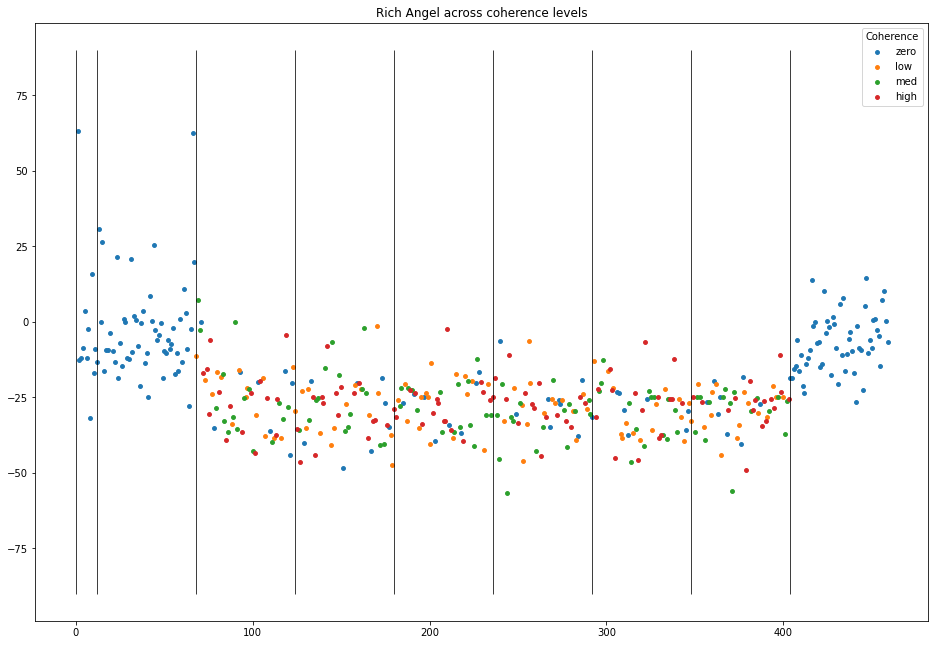

In [49]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.coh_cat.unique():
    y = data[data.coh_cat == i]
    x = y.index.to_numpy()
    ax.scatter(x, y.reach_target, label=i, s=15)
ax.legend(title="Coherence")
ax.vlines(np.where(data.trial_in_block == 0)[0], ymin=-90, ymax=90, color="black", lw=0.75)
plt.title("Rich Angel across coherence levels");

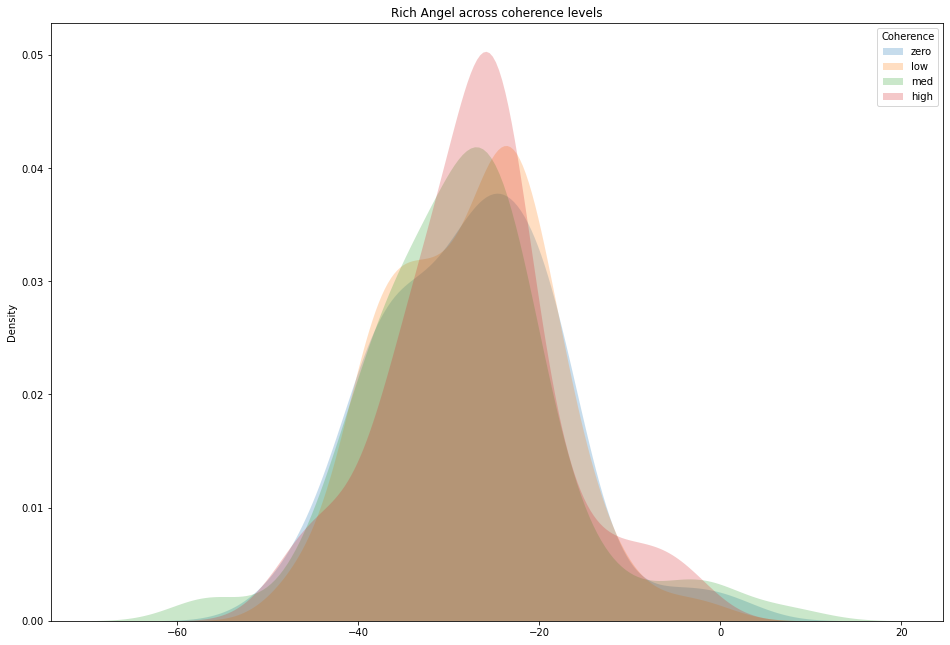

In [50]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.coh_cat.unique():
    y = data[(data.coh_cat == i) & (data.block > 2) & (data.block < 9)].reach_target.to_numpy()
    y = y[np.isfinite(y)]
    sns.kdeplot(y, ax=ax, fill=True, lw=0, label=i)
ax.legend(title="Coherence")
plt.title("Rich Angel across coherence levels");

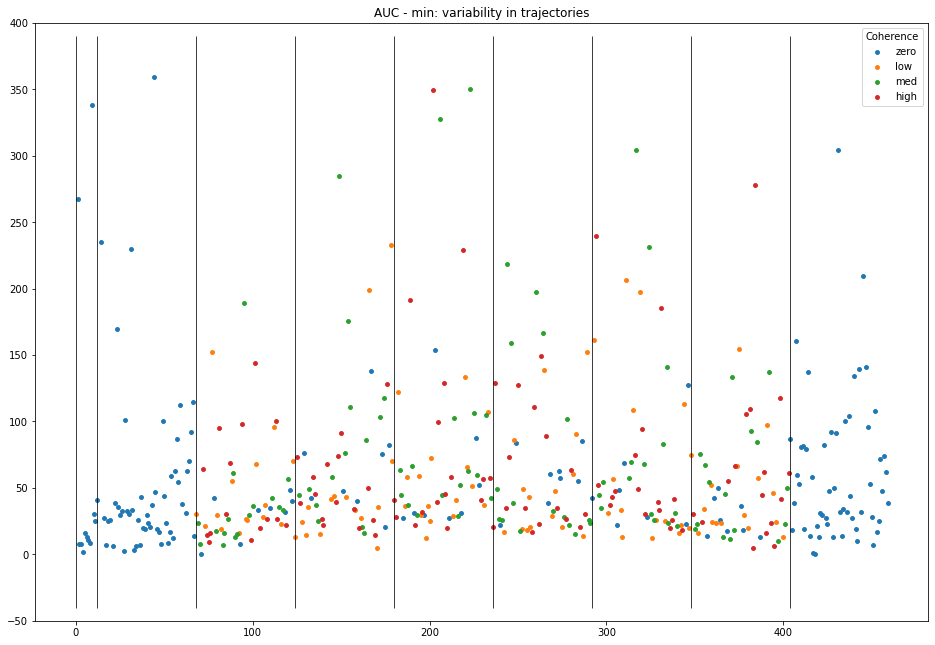

In [51]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.coh_cat.unique():
    y = data[data.coh_cat == i]
    x = y.index.to_numpy()
    ax.scatter(x, y.auc_from_min, label=i, s=15)
ax.legend(title="Coherence")
ax.vlines(np.where(data.trial_in_block == 0)[0], ymin=-40, ymax=390, color="black", lw=0.75)
plt.ylim(-50, 400)
plt.title("AUC - min: variability in trajectories");

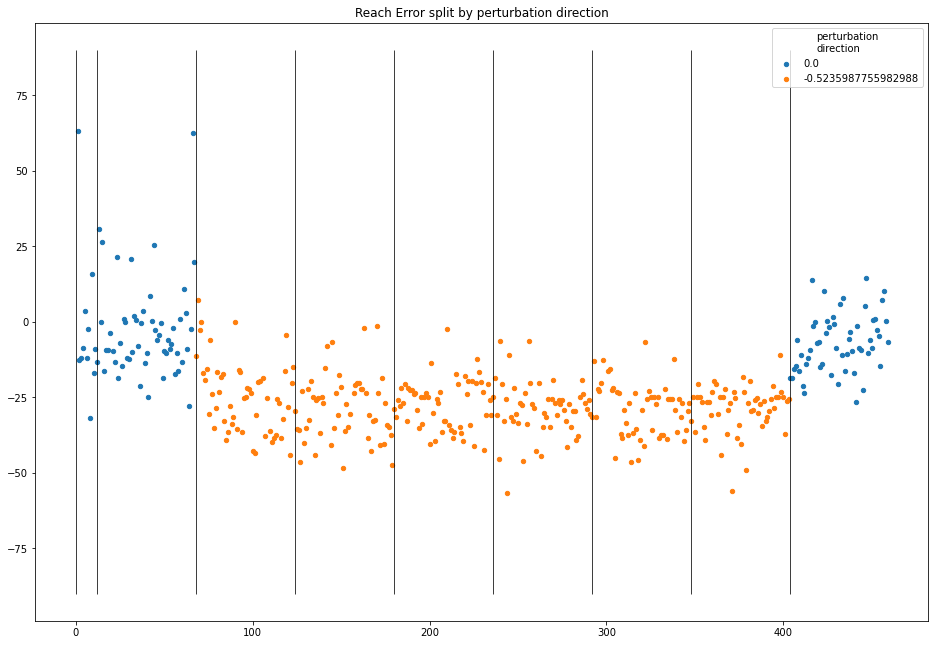

In [52]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.trial_perturb.unique():
    y = data[data.trial_perturb == i]
    x = y.index.to_numpy()
    ax.scatter(x, y.reach_target, label=i, s=19)
ax.legend(title="perturbation\ndirection")
ax.vlines(np.where(data.trial_in_block == 0)[0], ymin=-90, ymax=90, color="black", lw=0.75)
plt.title("Reach Error split by perturbation direction");

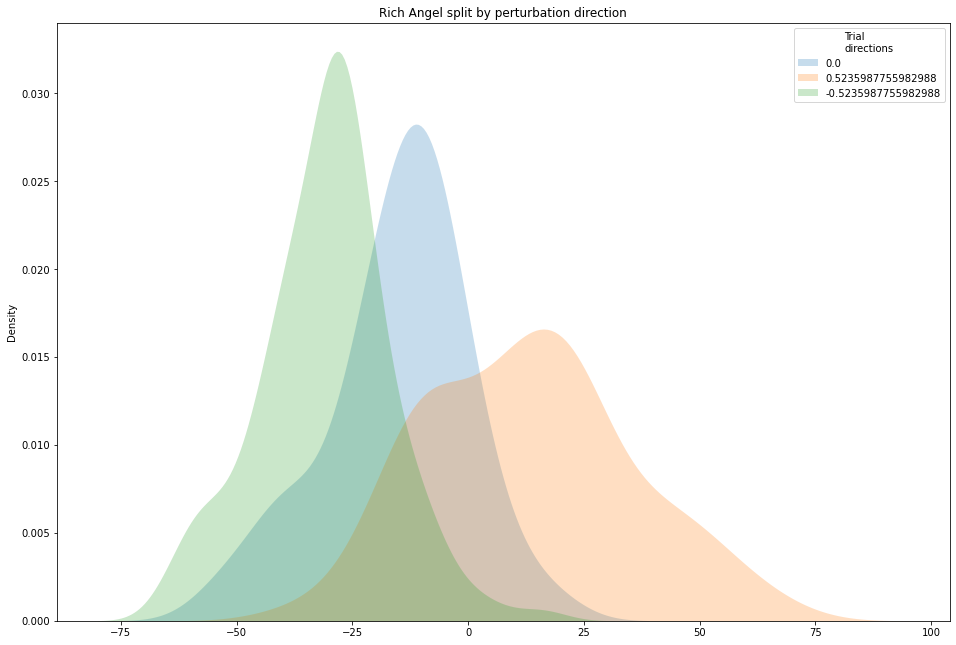

In [68]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.trial_perturb.unique():
    y = data[(data.trial_perturb == i) & (data.block > 2) & (data.block < 9)].reach_target.to_numpy()
    y = y[np.isfinite(y)]
    sns.kdeplot(y, ax=ax, fill=True, lw=0, label=i)
ax.legend(title="Trial\ndirections")
plt.title("Rich Angel split by perturbation direction");

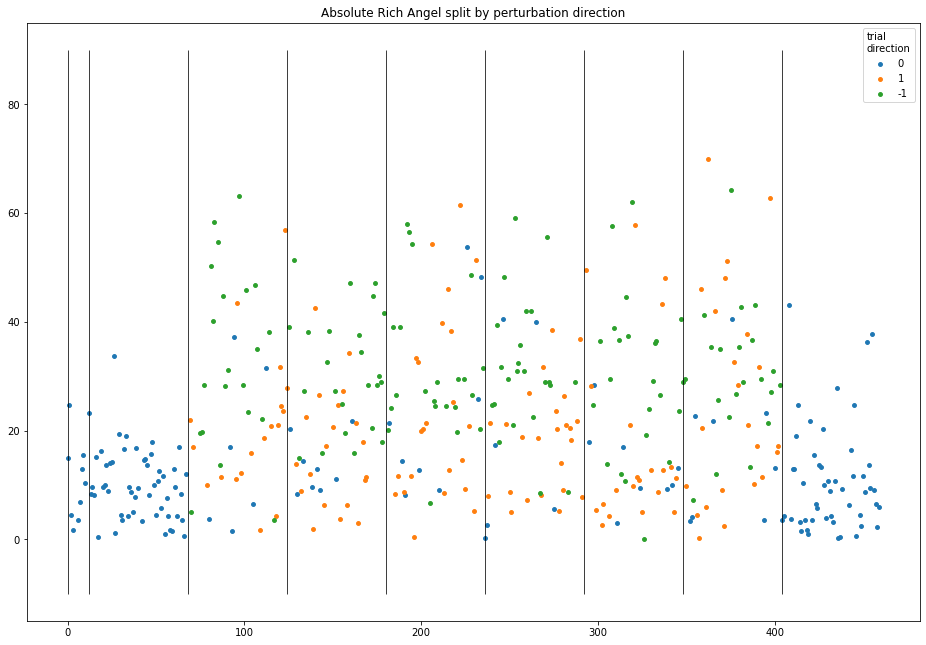

In [36]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.trial_directions.unique():
    y = data[data.trial_directions == i]
    x = y.index.to_numpy()
    ax.scatter(x, np.abs(y.reach_target), label=i, s=15)
ax.legend(title="trial\ndirection")
ax.vlines(np.where(data.trial_in_block == 0)[0], ymin=-10, ymax=90, color="black", lw=0.75)
plt.title("Absolute Rich Angel split by perturbation direction");

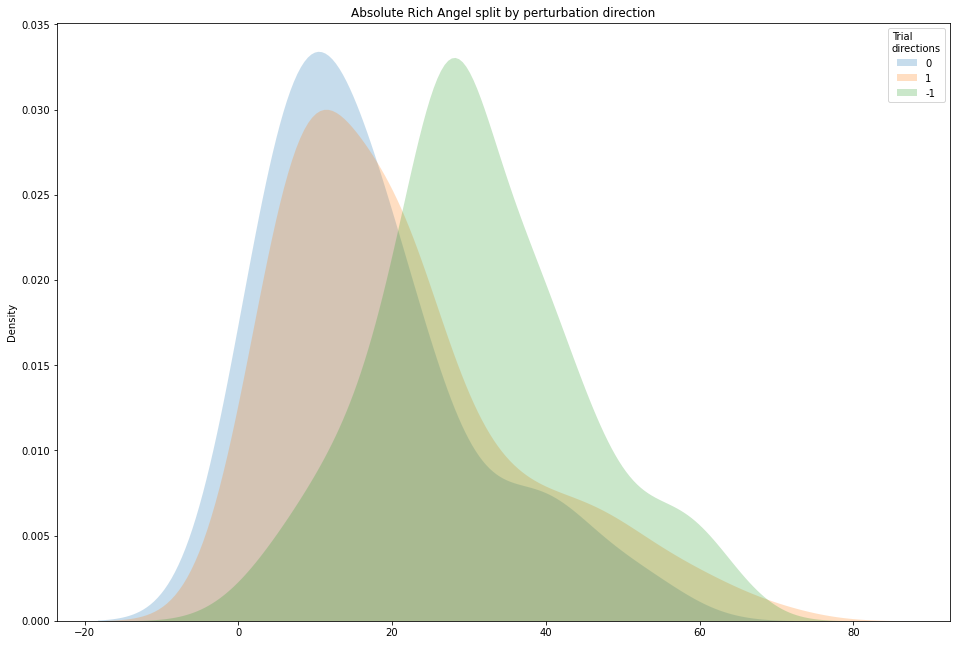

In [45]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.trial_directions.unique():
    y = data[(data.trial_directions == i) & (data.block > 2) & (data.block < 9)].reach_target.to_numpy()
    y = np.abs(y[np.isfinite(y)])
    sns.kdeplot(y, ax=ax, fill=True, lw=0, label=i)
ax.legend(title="Trial\ndirections")
plt.title("Absolute Rich Angel split by perturbation direction");